# **Data Background**

The dataset comprises transactional records from Maven Roasters, a fictional NYC-based coffee shop operating across three distinct locations. It encompasses comprehensive details such as transaction dates, timestamps, geographical specifics, and product-level information.

Based on the dataset information, these are the columns and their description:

| Field            | Type    | Description |
| ---              | ---     | ---         |
| transaction_id   | Numeric | Unique identifier for each transaction. |
| transaction_date | Date    | Date when the transaction occurred. |
| transaction_time | Time    | Time of the transaction. |
| transaction_qty  | Numeric | Quantity of products purchased in a transaction. |
| store_id         | Numeric | Unique identifier for each store location. |
| store_location   | Text    | Name or description of the store’s physical location. |
| product_id       | Numeric | Unique identifier for each product sold.                                                               |
| unit_price       | Numeric | Price of a single unit of the product in the transaction.                                              | 
| product_category | Text    | General category to which the product belongs (e.g., Coffee, Tea, Drinking Chocolate).                  |
| product_type     | Text    | Specific type or variant of the product (e.g., Gourmet brewed coffee, Brewed Chai tea, Hot chocolate). |
| product_detail   | Text    | Additional details about the product (e.g., specific flavor, size, or blend).                          |


# **Objectives**

Our primary goal in this analysis is to understand the data and generate valuable insights for future decision-making. We will explore the data as much as possible. We can achieve our primary goal by performing the following:

1.) **Identify the data structure**: Through exploratory analysis, we can recognize the various data types that are present, how they are distributed, and the general structure of the data.

2.) **Ensure data quality**: We will evaluate the reliability and quality of the data by detecting anomalies and outliers in the dataset, addressing missing values, and correcting data type errors.

2.) **Identify patterns and relationships**: Analyze the dataset’s pattern and the relationship between its columns by examining it and applying different techniques to find hidden patterns.

# **Enviroment Setup**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [2]:
# Importing data from CSV source
data = pd.read_csv(r"C:/Users/Geoma/Downloads/coffee-shop-sales-revenue.csv", delimiter = '|')

Let's take a quick look of the data

In [3]:
# Quick look
data.sample(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
15370,15400,2023-01-27,17:47:12,1,3,Astoria,47,3.0,Tea,Brewed Green tea,Serenity Green Tea Lg
39896,40003,2023-03-10,08:34:15,1,5,Lower Manhattan,23,2.5,Coffee,Drip coffee,Our Old Time Diner Blend Rg
5870,5900,2023-01-11,11:17:45,1,5,Lower Manhattan,65,0.8,Flavours,Sugar free syrup,Sugar Free Vanilla syrup
57760,57871,2023-04-04,14:45:36,2,3,Astoria,45,3.0,Tea,Brewed herbal tea,Peppermint Lg
52083,52190,2023-03-27,11:22:32,2,3,Astoria,50,2.5,Tea,Brewed Black tea,Earl Grey Rg


# **Data Cleaning**

## **Data Types**

In [4]:
# Data columns info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


We will have several changes to our data types and columns to make our analysis easier:

- **transaction_id**: from integer to character since it’s a unique identifier for each transaction.

- **transaction_date**: from character to date it will make an unclear output if set to character.

- **transaction_time**: from character to timestamps it will make an unclear output if set to character.

- **store_id**: from integer to character since it’s a unique identifier for each store location.

- **product_id**: from integer to character since it’s a unique identifier for each product.

### **Converting Data Types**

In [5]:
# Transaction ID: Integer to String
data['transaction_id'] = data['transaction_id'].astype(str)

# Transaction Date: Character to Date
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

#Transaction Time: Character to Datetime
data['transaction_time'] = pd.to_datetime(data['transaction_time'])

#Store ID: Integer to String
data['store_id'] = data['store_id'].astype(str)

#Product ID: Integer to String
data['product_id'] = data['product_id'].astype(str)

Now that we have done converting columns, let’s proceed to our next step.

## **Missing Values**

In [6]:
# Total Number of Rows
TotalRows = data.size

# Total Number of Missing Value
MissingValue = data.isna().sum()

# Proportion of Missing Value by Column
MissingProp = (MissingValue / TotalRows) * 100

# Converting to DataFrame
MissingData = pd.DataFrame({'MissingCount': MissingValue, 'Proportion': MissingProp})

print(MissingData)

                  MissingCount  Proportion
transaction_id               0         0.0
transaction_date             0         0.0
transaction_time             0         0.0
transaction_qty              0         0.0
store_id                     0         0.0
store_location               0         0.0
product_id                   0         0.0
unit_price                   0         0.0
product_category             0         0.0
product_type                 0         0.0
product_detail               0         0.0


As shown table above, we can see we have complete record, no missing values at all in our data which will lead us straight to our next step.

## **Feature Creation**

#### **Revenue**
We can create a new column from our existing columns by multiplying the **quantity** and **price**.

In [7]:
# New Feature: Revenue
data['revenue'] = data['unit_price'] * data['transaction_qty']

#### **Size**
We can extract the size detail of every transactions from product details provided in the data and create column.

In [8]:
# New Feature: Size
data['size'] = np.where(data['product_detail'].str.contains('Sm'), 'Small',
                        np.where(data['product_detail'].str.contains('Rg'), 'Regular',
                                 np.where(data['product_detail'].str.contains('Lg'), 'Large', 'Undefined')))

#### **Hour, Day of Week, and Month**

Extracting the day of the week, month, and year from the Transaction Date column that will help us to understand the transaction trend later on.

In [9]:
# New Feature: Hour
data['hour'] = data['transaction_time'].dt.hour.astype(str)

# New Feature: DayoftheWeek
data['dayofweek'] = data['transaction_date'].dt.dayofweek.astype(str)

# New Feature: Month
data['month'] = data['transaction_date'].dt.month.astype(str)

### **Removal of Columns**
Since some of the columns in our dataset are already represented in other formats, we will be removing those extra columns.

In [10]:
# Removing columns
data = data.drop(['transaction_time','store_id', 'product_id', 'product_detail'], axis = 1)

Let’s take a look at our dataset before continuing.

In [11]:
# Last look
data.sample(10)

,transaction_id,transaction_date,transaction_qty,store_location,unit_price,product_category,product_type,revenue,size,hour,dayofweek,month
63121,63291,2023-04-10,1,Hell's Kitchen,4.00,Tea,Brewed Chai tea,4.00,Large,18,0,4
101586,101840,2023-05-20,2,Hell's Kitchen,3.00,Coffee,Barista Espresso,6.00,Undefined,10,5,5
70373,70543,2023-04-19,1,Astoria,3.75,Coffee,Barista Espresso,3.75,Undefined,8,2,4
49517,49624,2023-03-23,2,Hell's Kitchen,3.00,Coffee,Gourmet brewed coffee,6.00,Regular,17,3,3
98205,98459,2023-05-17,2,Hell's Kitchen,3.50,Coffee,Gourmet brewed coffee,7.00,Large,10,2,5
95953,96207,2023-05-15,1,Hell's Kitchen,3.50,Bakery,Biscotti,3.50,Undefined,11,0,5
18103,18133,2023-02-02,1,Astoria,2.45,Coffee,Premium brewed coffee,2.45,Small,13,3,2
115605,115867,2023-06-02,1,Lower Manhattan,3.10,Tea,Brewed Chai tea,3.10,Large,15,4,6
45696,45803,2023-03-18,2,Astoria,3.00,Coffee,Organic brewed coffee,6.00,Regular,9,5,3
36736,36793,2023-03-05,2,Hell's Kitchen,3.00,Coffee,Barista Espresso,6.00,Undefined,15,6,3


# **Exploratory Analysis**

### **Summary Statistics**
**Numerical Variables Summary Statistics**

In [12]:
# Numerical Summary
data.describe()

,transaction_date,transaction_qty,unit_price,revenue
count,149116,149116.000000,149116.000000,149116.000000
mean,2023-04-15 11:50:32.173609984,1.438276,3.382219,4.686367
min,2023-01-01 00:00:00,1.000000,0.800000,0.800000
25%,2023-03-06 00:00:00,1.000000,2.500000,3.000000
50%,2023-04-24 00:00:00,1.000000,3.000000,3.750000
75%,2023-05-30 00:00:00,2.000000,3.750000,6.000000
max,2023-06-30 00:00:00,8.000000,45.000000,360.000000
std,NaN,0.542509,2.658723,4.227099


**Insights**:

- **Date Range**: The dataset spans from January 1, 2023 to June 30, 2023.

- **Potential Outliers**: Revenue shows potential outliers with huge values.

-  **Right-Skewed Distribution**: Quantity, and Revenue shows their mean are higher than median indicating possible right-skewed distribution.

**Categorical Variables Summary Statistics**

In [13]:
# Numerical Summary
data.describe(include = ['object', 'category'])

,transaction_id,store_location,product_category,product_type,size,hour,dayofweek,month
count,149116,149116,149116,149116,149116,149116,149116,149116
unique,149116,3,9,29,4,15,7,6
top,1,Hell's Kitchen,Coffee,Brewed Chai tea,Regular,10,4,6
freq,1,50735,58416,17183,45789,18545,21701,35352


**Insights**:

- **Top Store Location**: Out of three locations, Hell’s Kitchens’ place is the most popular, accounting for 50,735 transactions.

- **Top Category**: Coffee was the most selling category accounting for 58,416 transactions.

- **Top Product**: Brewed Chai Tea was the most selling product with 17,183 sold product.

- **Top Size**: Regular size was the most frequent ordered size with 45,789 sold.

- **Busiest Month**: June has the most transactions, recording 35,352 transactions.

- **Busiest Day**: Friday was the popular day with 21,701 transactions.

- **Busiest Hour**: Around 10 a.m. was the busiest hour for the business, with 18,545 transactions took place during this period.



### **Distribution**

**Numerical Variables Distribution**

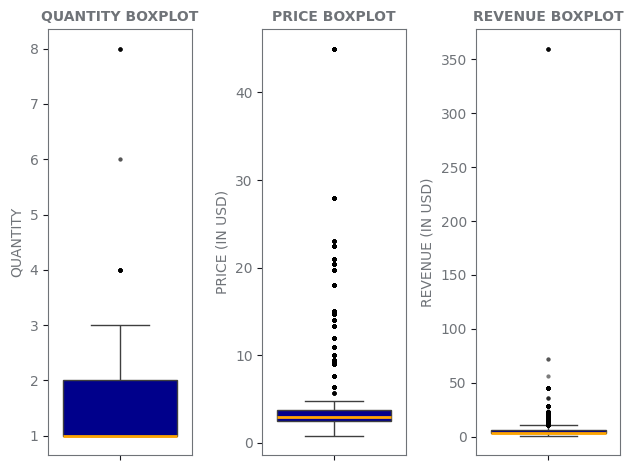

In [14]:
# Visual Layout Setting
fig, ax = plt.subplots(1, 3)

# Numerical Variables
columns = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()

for i in range(len(columns)):

    # Boxplot Setting
    sns.boxplot(data = data, y = columns[i], ax = ax[i], 
                
                # Median Line Setting
                medianprops = dict(color = 'orange', linewidth = 2), 

                # Markers Setting
                flierprops = dict(marker = ".", alpha = 0.3, markerfacecolor = 'black', markeredgecolor = 'None', color = 'None'),

                # Box Setting
                boxprops = dict(facecolor = 'darkblue'))
    
    # Revenue Boxplot
    if columns[i] == 'revenue':
        ax[i].set_title('REVENUE BOXPLOT', color = '#6F7378', fontweight = 'bold', size = 10)
        ax[i].set_ylabel('REVENUE (IN USD)', color = '#6F7378', size = 10)

    # Quantity Boxplot
    if columns[i] == 'transaction_qty':
        ax[i].set_title('QUANTITY BOXPLOT', color = '#6F7378', fontweight = 'bold', size = 10)
        ax[i].set_ylabel('QUANTITY', color = '#6F7378', size = 10)

    # Price Boxplot
    if columns[i] == 'unit_price':
        ax[i].set_title('PRICE BOXPLOT', color = '#6F7378', fontweight = 'bold', size = 10)
        ax[i].set_ylabel('PRICE (IN USD)', color = '#6F7378', size = 10)


    # Major Tick Color
    ax[i].tick_params(color = '#16161d') 
    
    # X and Y-axis Labels Color
    plt.setp(ax[i].get_xticklabels(), color = '#6F7378') 
    plt.setp(ax[i].get_yticklabels(), color = '#6F7378') 
    
    # Spine Color
    for spine in ax[i].spines.values():
        spine.set_edgecolor('#6F7378')
    
# Showing as tight layout
plt.tight_layout()

Due to outliers, it’s difficult to visualize the **interquartile range** of these columns: Price and Revenue. To better visualize it, we can temporarily zoom in on our y-axis.

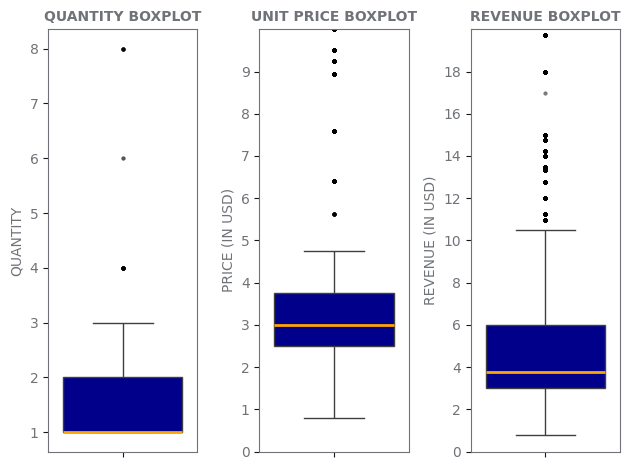

In [15]:
# Layout Setting
fig, ax = plt.subplots(1, 3)

# Numerical Variables
columns = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()

for i in range(len(columns)):

    # Boxplot Setting
    sns.boxplot(data = data, y = columns[i], ax = ax[i], 
                
                # Median Line Setting
                medianprops = dict(color = 'orange', linewidth = 2), 

                # Markers Setting
                flierprops = dict(marker = ".", alpha = 0.3, markerfacecolor = 'black', markeredgecolor = 'None', color = 'None'),

                # Box Setting
                boxprops = dict(facecolor = 'darkblue'))
    
    # Revenue Boxplot
    if columns[i] == 'revenue':
        ax[i].set_title('REVENUE BOXPLOT', color = '#6F7378', fontweight = 'bold', size = 10)
        ax[i].set_ylabel('REVENUE (IN USD)', color = '#6F7378', size = 10)
        ax[i].set_ylim(0, 20)
        ax[i].set_yticks(range(0, 20, 2))

    # Quantity Boxplot
    if columns[i] == 'transaction_qty':
        ax[i].set_title('QUANTITY BOXPLOT', color = '#6F7378', fontweight = 'bold', size = 10)
        ax[i].set_ylabel('QUANTITY', color = '#6F7378', size = 10)

    # Price Boxplot
    if columns[i] == 'unit_price':
        ax[i].set_title('UNIT PRICE BOXPLOT', color = '#6F7378', fontweight = 'bold', size = 10)
        ax[i].set_ylabel('PRICE (IN USD)', color = '#6F7378', size = 10)
        ax[i].set_ylim(0, 10)
        ax[i].set_yticks(range(0, 10, 1))

    # Major Tick Color
    ax[i].tick_params(color = '#16161d') 
    
    # X and Y-axis Labels Color
    plt.setp(ax[i].get_xticklabels(), color = '#6F7378') 
    plt.setp(ax[i].get_yticklabels(), color = '#6F7378') 
    
    # Spine Color
    for spine in ax[i].spines.values():
        spine.set_edgecolor('#6F7378')
    
# Showing as Tight Layout
plt.tight_layout()

**Insights**:

- **Quantity**: The quantity for transactions range from 1 to 2. There are outliers exceeding more than 4 quantity.

- **Price**: The price falls between 2.5 USD to 3.75 USD. Outliers exceeding above 5, and we have on exceptional reaching over 40.

- **Revenue**: The generated revenue from transaction falls between 3 USD to 6 USD. There are outliers above 10 USD, one reaching over 300 USD.

**Dealing with Outliers**



As noted earlier in summary statistics of numerical variables, all variables show potential outliers. Based on our boxplot, **Revenue** column reveals a massive value generated. This outliers in **Revenue** column are exceeding more than 300 USD, before we deal with this outliers, let’s investigate it first.

In [16]:
# Outliers Filter
data[data['revenue'] > 300]

,transaction_id,transaction_date,transaction_qty,store_location,unit_price,product_category,product_type,revenue,size,hour,dayofweek,month
9310,9340,2023-01-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,9,1,1
9365,9395,2023-01-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,9,1,1
68806,68976,2023-04-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,9,0,4
68981,69151,2023-04-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,11,0,4
97979,98233,2023-05-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,9,2,5
98275,98529,2023-05-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,11,2,5
133186,133523,2023-06-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,9,5,6
133337,133674,2023-06-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,10,5,6
133407,133744,2023-06-17,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,11,5,6
148702,149043,2023-06-30,8,Hell's Kitchen,45.0,Coffee beans,Premium Beans,360.0,Undefined,11,4,6


As we can see, the transactions are constant in terms of the quantity of units purchased, the store’s location, and the type or category of products purchased. Although we can presume that all of these transactions are either from the same customer or from different customers, but, due to insufficient information and proof, we can’t prove these assumptions.

Furthermore, we will have to remove these transactions from our data set to keep the consistency and accuracy for further analysis.

**Removing Outliers**

In [17]:
# Filtering outliers
data = data[~(data['revenue'] > 300)]

Now that we removed the outliers, we will continue our analysis using **Histograms**.


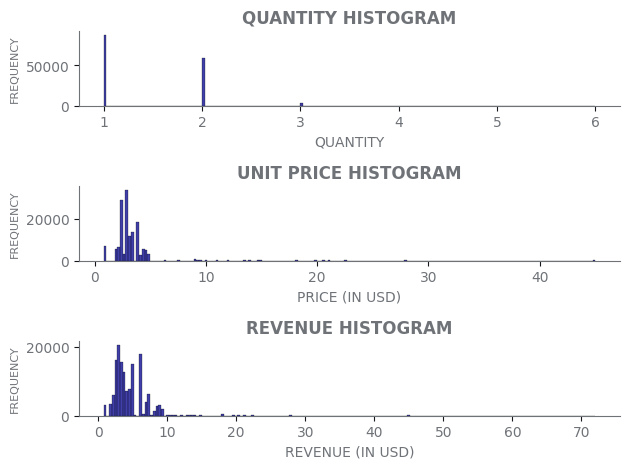

In [18]:
# Layout Setting
fig, ax = plt.subplots(3, 1)

# Numerical Variables
columns = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()

for i in range(len(columns)):

    # Histogram Setting
    sns.histplot(data = data, x = columns[i], ax = ax[i], bins = 180, color = 'darkblue')

    # Revenue Histogram
    if columns[i] == 'revenue':
        ax[i].set_title('REVENUE HISTOGRAM', fontweight = "bold", color = '#6F7378')
        ax[i].set_xlabel('REVENUE (IN USD)', color = '#6F7378')

    # Quantity Histogram
    if columns[i] == 'transaction_qty':
        ax[i].set_title('QUANTITY HISTOGRAM', fontweight = "bold", color = '#6F7378')
        ax[i].set_xlabel('QUANTITY', color = '#6F7378')
    
    # Price Histogram
    if columns[i] == 'unit_price':
        ax[i].set_title('UNIT PRICE HISTOGRAM', fontweight = "bold", color = '#6F7378')
        ax[i].set_xlabel('PRICE (IN USD)', color = '#6F7378')

    # Y-axis Label
    ax[i].set_ylabel('FREQUENCY', color = '#6F7378', size = 8)
    
    # Major Tick Color
    ax[i].tick_params(color = '#16161d') 
    
    # X and Y-axis Labels Color
    plt.setp(ax[i].get_xticklabels(), color = '#6F7378') 
    plt.setp(ax[i].get_yticklabels(), color = '#6F7378') 

    # Spine Color
    for spine in ax[i].spines.values():
        spine.set_edgecolor('#6F7378')
    
    # Despine
    sns.despine(right = True)

# Showing as Tight Layout
plt.tight_layout()

As we mentioned earlier in summary statistics, all numerical variables are possible right-skewed distributed. We can confirm this by measuring their skewness.

In [19]:
# Rename Columns
columns = data.rename(columns = {'revenue':'Revenue', 'transaction_qty':'Quantity', 'unit_price':'Price' })

# Skewness
columns.skew(numeric_only = True)

Quantity    0.693727
Price       8.407070
Revenue     5.047491
dtype: float64

As shown above, we can see that all numerical variables are indeed right-skewed distributed, with **Price** column being the most noticeable.

**Categorical Variable Distribution**

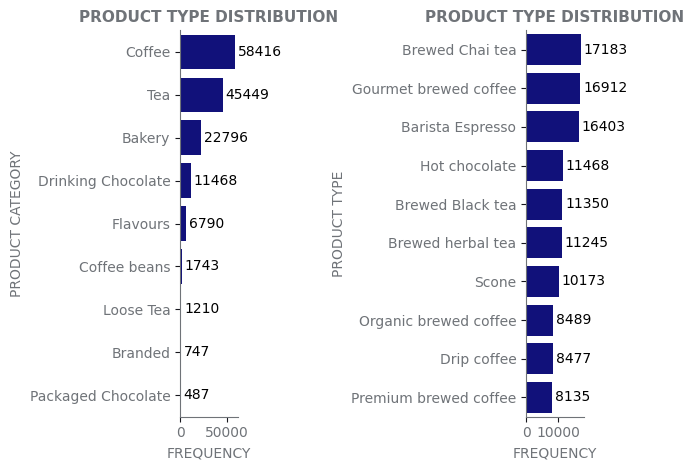

In [20]:
# Columns
columns = ['product_category', 'product_type']

# Layout Setting
fig, ax = plt.subplots(1, 2)

for i in range(len(columns)):
    
    # Countplot Setting
    sns.countplot(data = data, y = columns[i], ax = ax[i], color = 'darkblue',
                  order = data[columns[i]].value_counts().iloc[:10].index)
    
    # Creating label
    label = data[columns[i]].value_counts().iloc[:10].values
    
    #Product Category Countplot
    if columns[i] == 'product_category':
        ax[i].set_title('PRODUCT TYPE DISTRIBUTION', size = 11, fontweight = 'bold', color = '#6F7378')
        ax[i].set_ylabel('PRODUCT CATEGORY', size = 10, color = '#6F7378')
     
    # Product Type Countplot
    if columns[i] == 'product_type':
        ax[i].set_title('PRODUCT TYPE DISTRIBUTION', size = 11, fontweight = 'bold', color = '#6F7378')
        ax[i].set_ylabel('PRODUCT TYPE', size = 10, color = '#6F7378')  
    
    # X-axis Label
    ax[i].set_xlabel('FREQUENCY', size = 10, color = '#6F7378')
    
    # Bar Labels
    ax[i].bar_label(container = ax[i].containers[0], labels = label, padding = 2)

    # Major Tick Color
    ax[i].tick_params(color = '#16161d') 
    
    # X and Y-axis Labels Color
    plt.setp(ax[i].get_xticklabels(), color = '#6F7378') 
    plt.setp(ax[i].get_yticklabels(), color = '#6F7378') 

    # Spine Color
    for spine in ax[i].spines.values():
        spine.set_edgecolor('#6F7378')
    
    # Despine
    sns.despine(right = True)

 # Showing as Tight Layout     
plt.tight_layout()

# Adjust Width Space
plt.subplots_adjust(wspace = 5)

**Insights**:

- **Product Category**: Coffee was the best selling product category with 58,416 transactions.

- **Product Type**: Brewed Chai Tea, with 17,183 transactions, was the most popular product type under the tea category.

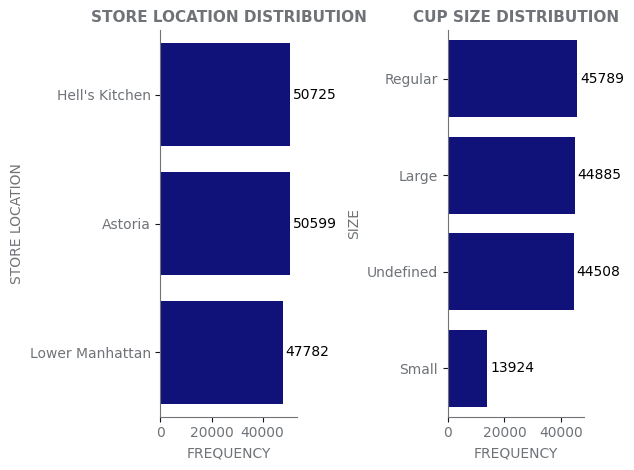

In [21]:
# Columns
columns = ['store_location', 'size']

# Layout Setting
fig, ax = plt.subplots(1, 2)

for i in range(len(columns)):
    
    # Countplot Setting
    sns.countplot(data = data, y = columns[i], ax = ax[i], color = 'darkblue',
                  order = data[columns[i]].value_counts().iloc[:10].index)
    
    # Creating label
    label = data[columns[i]].value_counts().iloc[:10].values
    
    # Store Location Countplot
    if columns[i] == 'store_location':
        ax[i].set_title('STORE LOCATION DISTRIBUTION', size = 11, fontweight = 'bold', color = '#6F7378')
        ax[i].set_ylabel('STORE LOCATION', size = 10, color = '#6F7378')
     
    # Size Countplot
    if columns[i] == 'size':
        ax[i].set_title('CUP SIZE DISTRIBUTION', size = 11, fontweight = 'bold', color = '#6F7378')
        ax[i].set_ylabel('SIZE', size = 10, color = '#6F7378')  
    
    # X-axis Label
    ax[i].set_xlabel('FREQUENCY', size = 10, color = '#6F7378')
    
    # Bar Labels
    ax[i].bar_label(container = ax[i].containers[0], labels = label, padding = 2)

    # Major Tick Color
    ax[i].tick_params(color = '#16161d') 
    
    # X and Y-axis Labels Color
    plt.setp(ax[i].get_xticklabels(), color = '#6F7378') 
    plt.setp(ax[i].get_yticklabels(), color = '#6F7378') 

    # Spine Color
    for spine in ax[i].spines.values():
        spine.set_edgecolor('#6F7378')
    
    # Despine
    sns.despine(right = True)

 # Showing as Tight Layout     
plt.tight_layout()

**Insights**:

- **Store Location**: Hell’s kitchen was the popular with more than 50,000 transactions. Astoria being the second, only few hundreds off with Hell’s kitchen.

- **Cup Size**: Regular was the most ordered cup size, large being the second. We can see that we have massive amount of undefined cup size with only a minimum Amount of difference to Large

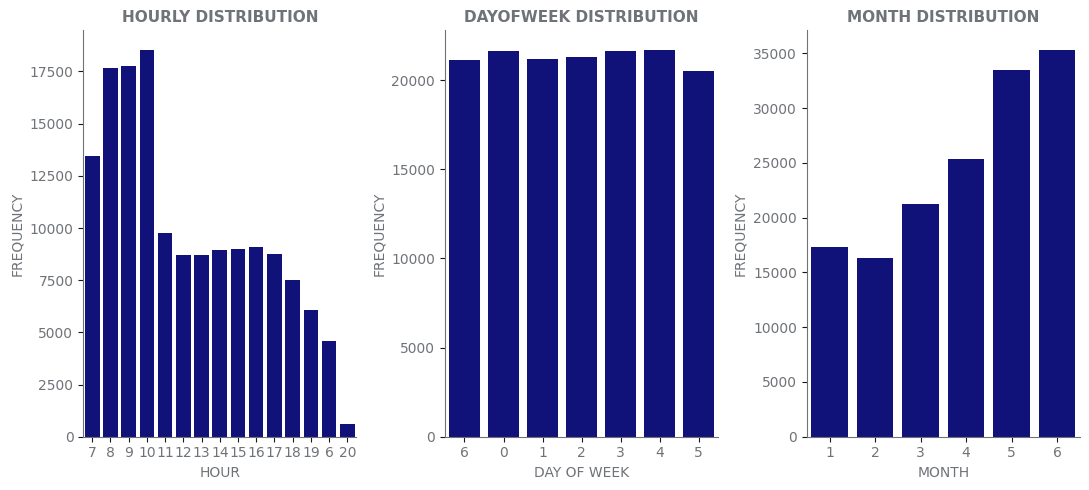

In [22]:
# Columns
columns = ['hour', 'dayofweek', 'month']

# Layout Setting
fig, ax = plt.subplots(1, 3, figsize = (11, 5))

for i in range(len(columns)):
    
    # Countplot Setting
    sns.countplot(data = data, x = columns[i], ax = ax[i], color = 'darkblue')
    
    # Creating label
    label = data[columns[i]].value_counts().iloc[:10].values
    
    # Hour Countplot
    if columns[i] == 'hour':
        ax[i].set_title('HOURLY DISTRIBUTION', size = 11, fontweight = 'bold', color = '#6F7378')
        ax[i].set_xlabel('HOUR', size = 10, color = '#6F7378')
     
    # DayofWeek Countplot
    if columns[i] == 'dayofweek':
        ax[i].set_title('DAYOFWEEK DISTRIBUTION', size = 11, fontweight = 'bold', color = '#6F7378')
        ax[i].set_xlabel('DAY OF WEEK', size = 10, color = '#6F7378') 

    # Month Countplot
    if columns[i] == 'month':
        ax[i].set_title('MONTH DISTRIBUTION', size = 11, fontweight = 'bold', color = '#6F7378')
        ax[i].set_xlabel('MONTH', size = 10, color = '#6F7378')  
    
    # Y-axis Label
    ax[i].set_ylabel('FREQUENCY', size = 10, color = '#6F7378')

    # Major Tick Color
    ax[i].tick_params(color = '#16161d') 
    
    # X and Y-axis Labels Color
    plt.setp(ax[i].get_xticklabels(), color = '#6F7378') 
    plt.setp(ax[i].get_yticklabels(), color = '#6F7378') 

    # Spine Color
    for spine in ax[i].spines.values():
        spine.set_edgecolor('#6F7378')
    
    # Despine
    sns.despine(right = True)

 # Showing as Tight Layout     
plt.tight_layout()

**Insights**:

- **Hourly**: The shop’s busiest hours were commonly in the morning based on the hourly distribution, which showed a pattern in customer behavior. 10 AM is the busiest time of day at the store, with over 18,000 transactions.

- **DayOfWeek**: A stable trend all throughout the week with an average of 20,000 transactions.

- **Month**: An increasing trend shown in Month distribution, as June was the highest with more than 30,000 transactions.

# **Bivariate & Multivariate Analysis**

## **Numerical Variables Relationship**

Text(0.5, 1.0, 'NUMERICAL CORRELATION HEATMAP')

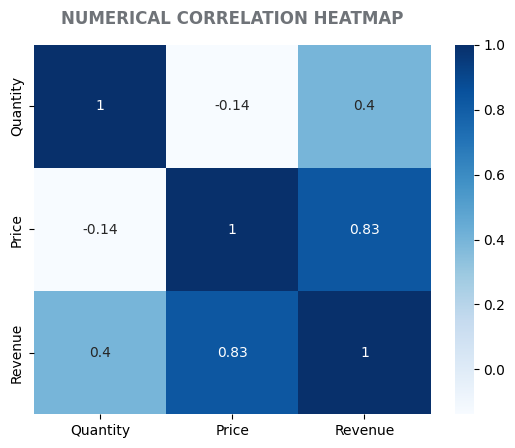

In [23]:
# Filter Only Numerical Variables
numerical_variables = data.rename(columns = {'transaction_qty':'Quantity', 'unit_price':'Price', 'revenue':'Revenue'})

# Heatmap Setting
sns.heatmap(numerical_variables.corr(numeric_only = True), annot = True, cmap = 'Blues')

# Heatmap Title
plt.title('NUMERICAL CORRELATION HEATMAP', pad = 15, weight = 'bold', color = '#6F7378')

As shown above, we have high correlations between **unit price** and **revenue**, and low correlation between **revenue** and **quantity**.

Let’s check the numerical relationship using pair plot.

Text(0.5, 1.05, 'NUMERICAL VARIABLES PAIRPLOT')

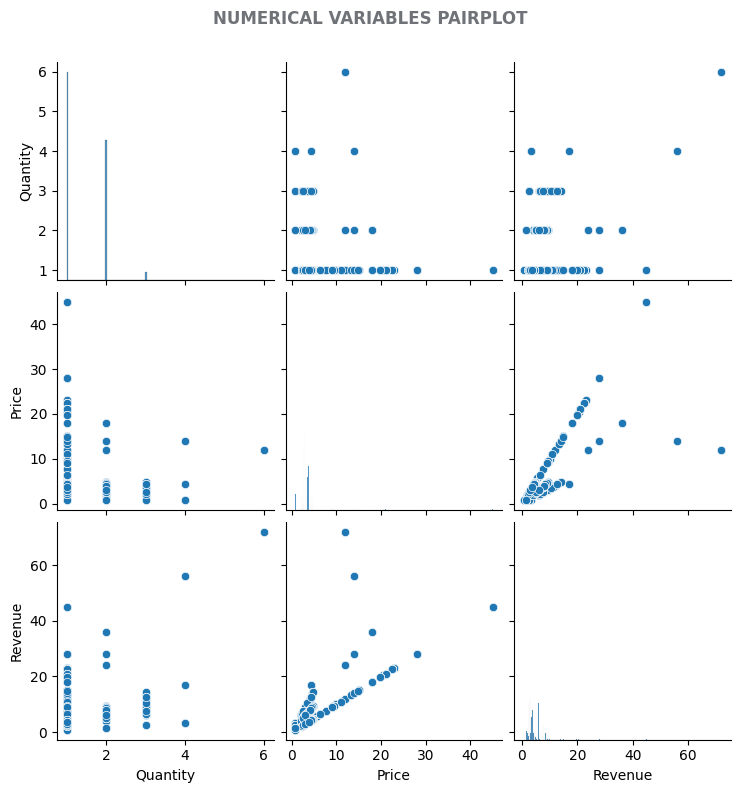

In [24]:
# Pairplot Setting
sns.pairplot(numerical_variables[['Quantity', 'Price', 'Revenue']]).fig.suptitle('NUMERICAL VARIABLES PAIRPLOT', y = 1.05, fontweight = 'bold', color = '#6F7378')

The strong positive correlation between **Revenue** and **Unit Price** is clear. The behavior of customers, who typically purchase higher-quality goods, makes this possible. We can presume that expensive coffee is a better product. Customers in this situation are more likely to spend money on high-quality goods, which boosts overall sales.

On the other hand, we can observe the low correlation between **Quantity** and **Revenue**. This is made possible by the fact that the coffee industry, where our dataset is derived from, typically values quality over quantity in consumer behavior. Only a tiny proportion of customers in the transaction purchased more than two coffees, as can be seen in our transaction quantity distribution.

## **Sales Performance**

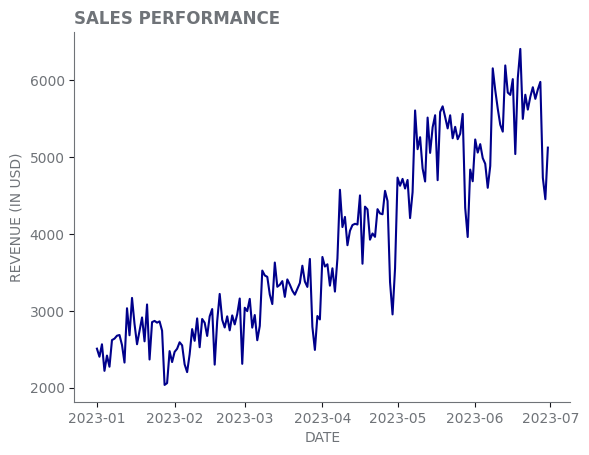

In [25]:
# Sales Data
sales = data.groupby('transaction_date', as_index = False)['revenue'].sum()

# Layout Setting
fig, ax = plt.subplots()

# Lineplot Setting
sns.lineplot(data = sales, x = 'transaction_date', y = 'revenue', color = 'darkblue')

# Lineplot Title
plt.title('SALES PERFORMANCE', fontweight = 'bold', color = '#6F7378', loc = 'left')

# Y and X-axis Label
plt.ylabel('REVENUE (IN USD)', color = '#6F7378')
plt.xlabel('DATE', color = '#6F7378')

# Major Tick Color
ax.tick_params(color = '#16161d') 

# X and Y-axis Labels Color
plt.setp(ax.get_xticklabels(), color = '#6F7378') 
plt.setp(ax.get_yticklabels(), color = '#6F7378') 

# Spine Color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Despine
sns.despine(right = True)

# Show Visual
plt.show()

The sales revenue show a strong increasing incline pattern from January to end of June as shown above, with June reaching the highest point in sales performance; with sales exceeding 6,000 USD.

If we thoroughly examine the trend line, we can see that there is a declining trend at the beginning of each month and a significant fall at the end of each month. April until the end of June is when it’s most noticeable. We can look into this unusual pattern in more detail.

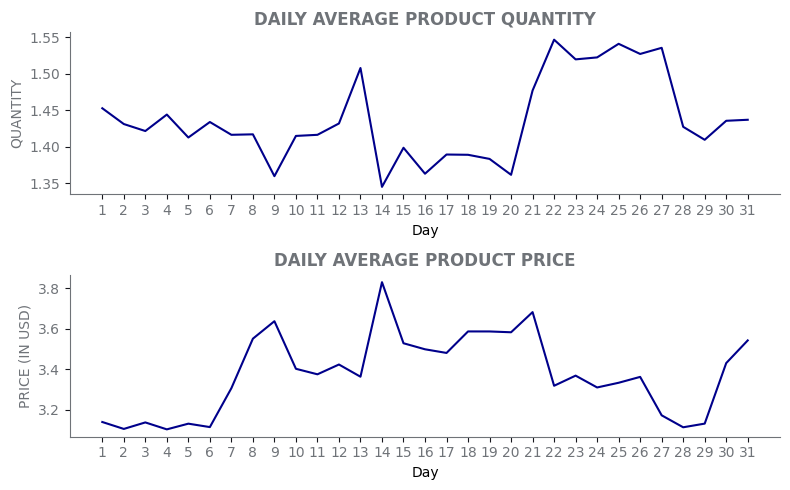

In [26]:
# New Feature: Day
data['day'] = data['transaction_date'].dt.day.astype('str')

# Columns
columns = ['transaction_qty', 'unit_price']

# Layout Setting
fig, ax = plt.subplots(2, 1, figsize = (8, 5))

for i in range(len(columns)):
    
    # Lineplot Setting
    sns.lineplot(data = data, x = 'day', y = columns[i], ci = None, ax = ax[i], color = 'darkblue')

    # Quantity Lineplot
    if columns[i] == 'transaction_qty':
        ax[i].set_title('DAILY AVERAGE PRODUCT QUANTITY', fontweight = 'bold', color = '#6F7378')
        ax[i].set_ylabel('QUANTITY', color = '#6F7378')
    
    # Unit Price Lineplot
    if columns[i] == 'unit_price':
        ax[i].set_title('DAILY AVERAGE PRODUCT PRICE', fontweight = 'bold', color = '#6F7378')
        ax[i].set_ylabel('PRICE (IN USD)', color = '#6F7378')
    
    # X-axis Label
    ax[i].set_xlabel('Day')

    # Major Tick Color
    ax[i].tick_params(color = '#16161d') 

    # X and Y-axis Labels Color
    plt.setp(ax[i].get_xticklabels(), color = '#6F7378') 
    plt.setp(ax[i].get_yticklabels(), color = '#6F7378') 

    # Spine Color
    for spine in ax[i].spines.values():
        spine.set_edgecolor('#6F7378')

    # Despine
    sns.despine(right = True)

# Output as Tight Layout
plt.tight_layout()

If we examine closely, the price trend line fluctuates. But quantity is the opposite. It displays the price flipped. The average quantity decreased as the average product price increased. We could assume that marketing techniques like sales, discounts, and the introduction of new or distinctive products drive consumers to purchase costly products.

Let’s now delve to daily average sales by week.

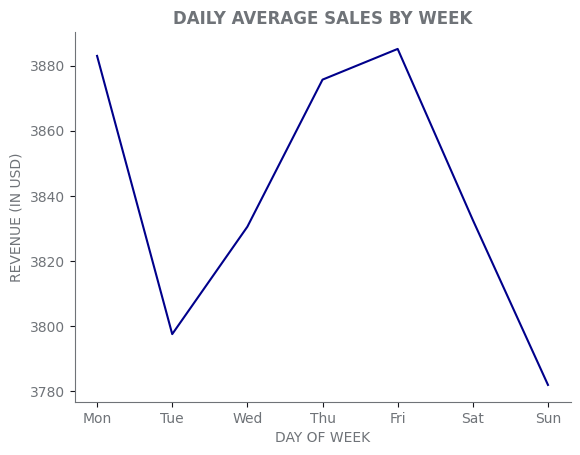

In [27]:
# Data
daily_sales = data.groupby(['dayofweek', 'transaction_date'])['revenue'].sum().groupby('dayofweek').mean().reset_index()

# Layout Setting
fig, ax = plt.subplots()

# Layout Setting
sns.lineplot(data = daily_sales, x = 'dayofweek', y = 'revenue', color = 'darkblue', ci = None)

# Title
ax.set_title('DAILY AVERAGE SALES BY WEEK', fontweight = 'bold', color = '#6F7378')

# Y and X-axis Title
ax.set_ylabel('REVENUE (IN USD)', color = '#6F7378')
ax.set_xlabel('DAY OF WEEK', color = '#6F7378')

# X-axis Labels Rename
ax.set_xticks(range(0, 7), labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Major Tick Color
ax.tick_params(color = '#16161d') 

# X and Y-axis Labels Color
plt.setp(ax.get_xticklabels(), color = '#6F7378') 
plt.setp(ax.get_yticklabels(), color = '#6F7378') 

# Spine Color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Despine
sns.despine(right = True)

The average daily sales were lowest on Sunday, with a sharp increase on Monday and a sharp decline on Tuesday, indicating an unusual pattern in the purchasing behavior of the customers. We can see that the trend line has a constant increase until Friday despite the initial dip. On Saturday, the daily average fell once more.

The weekday started with a sharp spike, which was followed by a steep decrease and a slowly increasing ascent until the end of the workday. This tendency may be related to the high volume of clients who are working during the workday. Customers that enjoy food and services and are searching for quick and convenient solutions. The sales are typically higher on weekdays.

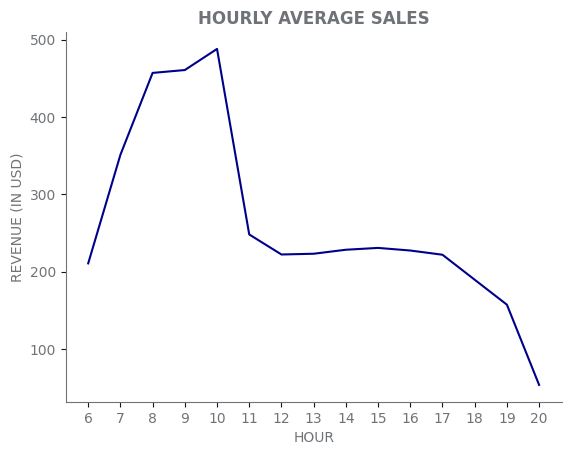

In [28]:
# Data
hourly_sales = data.groupby(['hour', 'transaction_date'])['revenue'].sum().groupby('hour').mean().reset_index().sort_values('hour', key = lambda x: x.astype(int))

# Layout Setting
fig, ax = plt.subplots()

# Lineplot Setting
sns.lineplot(data = hourly_sales, x = 'hour', y = 'revenue', color = 'darkblue', ci = None)

# Title
ax.set_title('HOURLY AVERAGE SALES', fontweight = 'bold', color = '#6F7378')

# Y and X-axis Label
ax.set_xlabel('HOUR', color = '#6F7378')
ax.set_ylabel('REVENUE (IN USD)', color = '#6F7378')

# Major Tick Color
ax.tick_params(color = '#16161d') 

# X and Y-axis Labels Color
plt.setp(ax.get_xticklabels(), color = '#6F7378') 
plt.setp(ax.get_yticklabels(), color = '#6F7378') 

# Spine Color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Despine
sns.despine(right = True)

The data shows that business hours begin at 6 in the morning. An early-morning steep curve suggests that most business sales occur more frequently during this time. From 8 a.m. up until 10 a.m. are the most active. As time goes by, business revenues begin to sharply fall, starting around 11 a.m. after which there was a short and constant decrease until the end of business hours.

## **Sales Performance By Location**


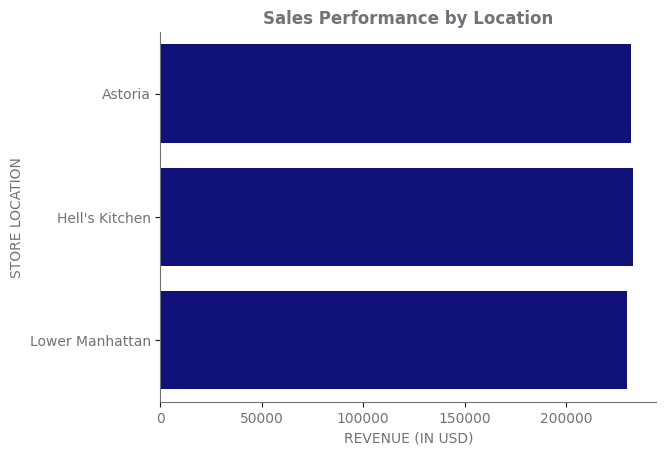

In [29]:
# Data
store_sales = data.groupby('store_location')['revenue'].sum().reset_index()

# Layout Setting
fig, ax = plt.subplots()

# Barplot Setting
sns.barplot(data = store_sales, y = 'store_location', x = 'revenue', color = 'darkblue')

# Title
plt.title('Sales Performance by Location', fontweight = 'bold', color = '#6F7378')

# Y and X-axis Label
plt.ylabel('STORE LOCATION', color = '#6F7378')
plt.xlabel('REVENUE (IN USD)', color = '#6F7378')

# Major Tick Color
ax.tick_params(color = '#16161d') 

# X and Y-axis Labels Color
plt.setp(ax.get_xticklabels(), color = '#6F7378') 
plt.setp(ax.get_yticklabels(), color = '#6F7378') 

# Spine Color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Despine
sns.despine(right = True)

# Show Visual
plt.show()

As can be seen above, Hell’s Kitchen Store was ranked highest out of the three stores. There’s only minimal difference in revenue between these three establishments.

We can further analyze the data for each store if there’s an underlying pattern for consumer behavior. We can investigate this by analyzing the median quantity and price for every store.

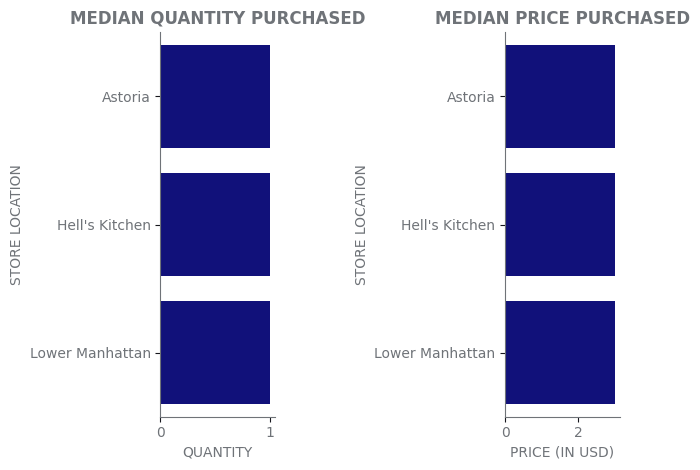

In [30]:
# Columns
columns = ['transaction_qty', 'unit_price']

# Data
median = data.groupby('store_location')[columns].median().reset_index()

# Layout Setting
fig, ax = plt.subplots(1, 2)

for i in range(len(columns)):

    # Barplot Setting
    sns.barplot(data = median, y = 'store_location', x = columns[i], ax = ax[i], color = 'darkblue')

    # Quantity Visual
    if columns[i] == 'transaction_qty':
        ax[i].set_title('MEDIAN QUANTITY PURCHASED', fontweight = 'bold', color = '#6F7378')
        ax[i].set_xlabel('QUANTITY', color = '#6F7378')

    # Unit Price Setting
    if columns[i] == 'unit_price':
        ax[i].set_title('MEDIAN PRICE PURCHASED', fontweight = 'bold', color = '#6F7378')
        ax[i].set_xlabel('PRICE (IN USD)', color = '#6F7378')

    # Y-axis Label
    ax[i].set_ylabel('STORE LOCATION', color = '#6F7378')

    # Major Tick Color
    ax[i].tick_params(color = '#16161d') 

    # X and Y-axis Labels Color
    plt.setp(ax[i].get_xticklabels(), color = '#6F7378') 
    plt.setp(ax[i].get_yticklabels(), color = '#6F7378') 

    # Spine Color
    for spine in ax[i].spines.values():
        spine.set_edgecolor('#6F7378')

    # Despine
    sns.despine(right = True)


# Show as Tight Layout
plt.tight_layout()

# Adjust Visual
plt.subplots_adjust(wspace = 2)

The median quantity and price purchases give the same outcome in every store. This indicates that regardless of the different store locations, the quantity and price purchased is constant. Given the consistency of the median quantity throughout the stores, this provides no significant context for our analysis.

**NOTE**: The median was used instead of the mean. The data has outliers that could potentially influence the result of the mean and give unrealiable insights.

## **Sales Performance by Category, Product, and Size**


First, let’s determine the number of category this coffee shop offers.

In [31]:
print(f"The coffee shop offers {data['product_category'].nunique()} unique products.")

The coffee shop offers 9 unique products.


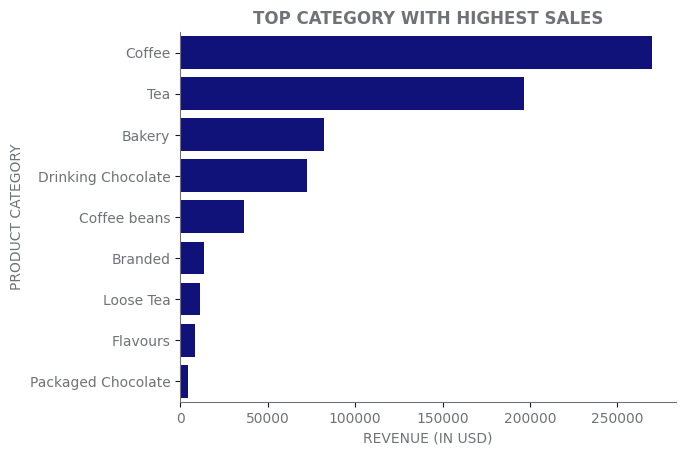

In [32]:
# Data
category_sales = data.groupby('product_category')['revenue'].sum().reset_index().sort_values('revenue', ascending = False)

# Layout Setting
fig, ax = plt.subplots()

# Barplot Setting
sns.barplot(data = category_sales, y = 'product_category', x = 'revenue', color = 'darkblue')

# Title
plt.title('TOP CATEGORY WITH HIGHEST SALES', fontweight = 'bold', color = '#6F7378')

# Y and X-axis Label
plt.ylabel('PRODUCT CATEGORY', color = '#6F7378')
plt.xlabel('REVENUE (IN USD)', color = '#6F7378')

# Major Tick Color
ax.tick_params(color = '#16161d') 

# X and Y-axis Labels Color
plt.setp(ax.get_xticklabels(), color = '#6F7378') 
plt.setp(ax.get_yticklabels(), color = '#6F7378') 

# Spine Color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Despine
sns.despine(right = True)

With sales of roughly 250,000 USD, coffee was the leading category. Tea came in second with approximately 195,000 USD in sales. There is a noticeable difference in margin between tea and the bakery category.

We can analyze the trend of these categories average daily sales for a 6-month period. Providing an insight into how these categories evolve over time. 

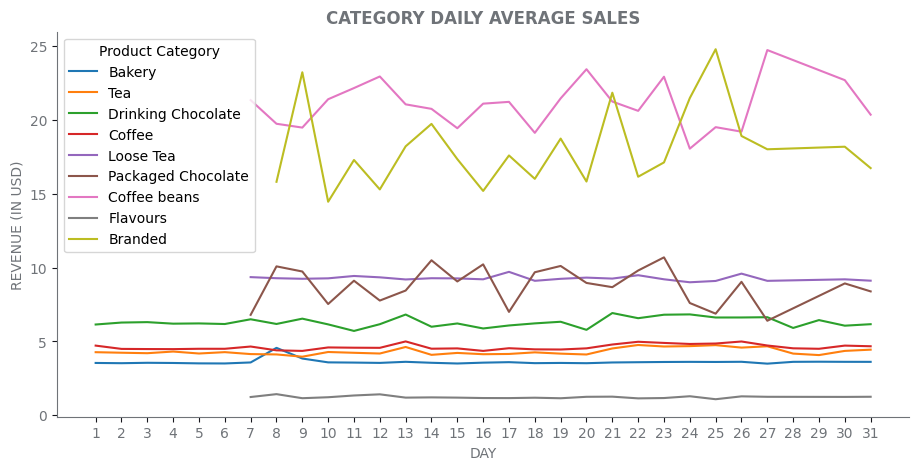

In [33]:
# Data
product_cateogory = data.groupby(['product_category', 'day'])['revenue'].mean().reset_index().sort_values('day', key = lambda x: x.astype(int))

# Layout Setting
fig, ax = plt.subplots(figsize = (11, 5))

# Lineplot Setting
sns.lineplot(data = product_cateogory, y = 'revenue', x = 'day', hue = 'product_category')

# Title
plt.title('CATEGORY DAILY AVERAGE SALES', fontweight = 'bold', color = '#6F7378')

# Y and X-axis Label
plt.ylabel('REVENUE (IN USD)', color = '#6F7378')
plt.xlabel('DAY', color = '#6F7378')

# Legend Setting
plt.legend(title = 'Product Category', loc = 2)

# Major Tick Color
ax.tick_params(color = '#16161d') 

# X and Y-axis Labels Color
plt.setp(ax.get_xticklabels(), color = '#6F7378') 
plt.setp(ax.get_yticklabels(), color = '#6F7378') 

# Spine Color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Despine
sns.despine(right = True)

When it comes to average daily sales, the category of coffee beans constantly leads the trend. It’s noticeable that this category fluctuates, particularly on day seventeen, assuming this category is caused by sales or promotional activity.

The majority of the categories’ daily average sales—bread, coffee, drinking chocolate, loose tea, tea, and flavors—show consistency. If we notice, several products’ sales consistently start on the 2nd week of each month. It’s possible that the business conducts restocking every first week of the month.

This insight is connected to consumer purchasing behavior, in which there was a fluctuating trend in the daily average product and quantity purchased. These categories—branded and coffee beans—make significant contributions to shifts or fluctuations in patterns. 

Let’s look at products. But first, let’s determine the number of products this coffee shop offers.

In [34]:
print(f"The coffee shop offers {data['product_type'].nunique()} unique products, let’s continue")

The coffee shop offers 29 unique products, let’s continue


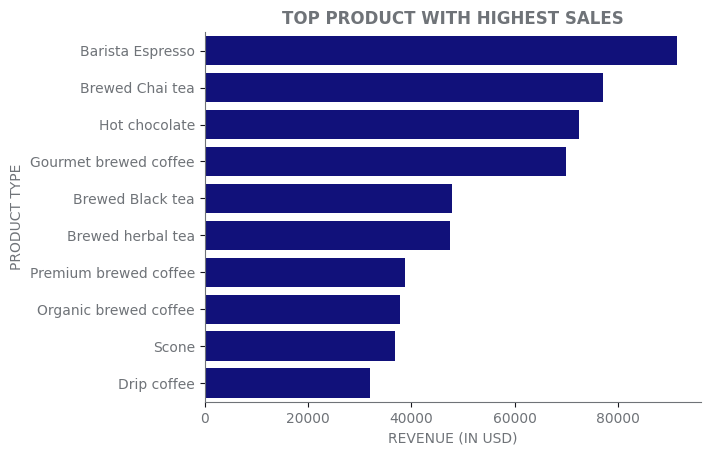

In [35]:
# Data
product_sales = data.groupby('product_type')['revenue'].sum().reset_index().sort_values('revenue', ascending = False)

# Layout Setting
fig, ax = plt.subplots()

# Barplot Setting
sns.barplot(data = product_sales.iloc[:10], y = 'product_type', x = 'revenue', color = 'darkblue')

# Title
plt.title('TOP PRODUCT WITH HIGHEST SALES', fontweight = 'bold', color = '#6F7378')

# Y and X-axis Label
plt.xlabel('REVENUE (IN USD)', color = '#6F7378')
plt.ylabel('PRODUCT TYPE', color = '#6F7378')

# Major Tick Color
ax.tick_params(color = '#16161d') 

# X and Y-axis Labels Color
plt.setp(ax.get_xticklabels(), color = '#6F7378') 
plt.setp(ax.get_yticklabels(), color = '#6F7378') 

# Spine Color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Despine
sns.despine(right = True)

These are the best-selling products out of the coffee shop’s 29 distinctive products. With sales of more than 80,000 USD, Barista Espresso, which falls within the coffee category. Then came Gourmet Brewed Coffee, Hot Chocolate, and Brewed Chai Tea, all of which had sales exceeding $65,000 USD.

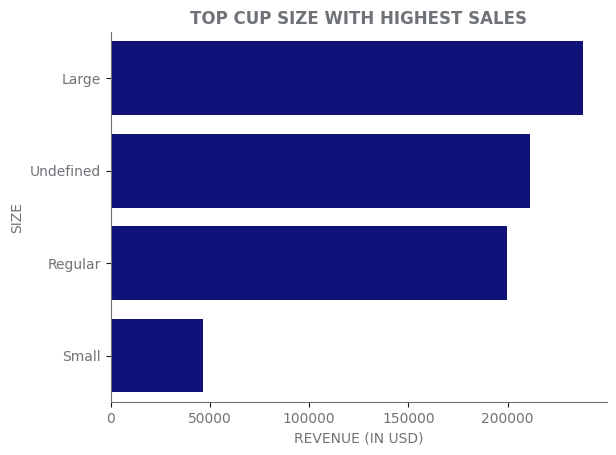

In [36]:
# Data
size_sales = data.groupby('size')['revenue'].sum().reset_index().sort_values('revenue', ascending = False)

# Layout Setting
fig, ax = plt.subplots()

# Barplot Setting
sns.barplot(data = size_sales.iloc[:10], y = 'size', x = 'revenue', color = 'darkblue')

# Title
plt.title('TOP CUP SIZE WITH HIGHEST SALES', fontweight = 'bold', color = '#6F7378')

# Y and X-axis Label
plt.xlabel('REVENUE (IN USD)', color = '#6F7378')
plt.ylabel('SIZE', color = '#6F7378')

# Major Tick Color
ax.tick_params(color = '#16161d') 

# X and Y-axis Labels Color
plt.setp(ax.get_xticklabels(), color = '#6F7378') 
plt.setp(ax.get_yticklabels(), color = '#6F7378') 

# Spine Color
for spine in ax.spines.values():
    spine.set_edgecolor('#6F7378')

# Despine
sns.despine(right = True)

Standing at the top of the list with sales of over 250,000 USD was Large, followed by undefined at exceed 210,000 USD and regular at approximately 200,000 USD. Assuming that small sizes are unpopular, we can see that small sizes only had small sales.

The undefined size belongs to another category, such as food, branded, or custom-sized cups made from other products.

# **Conclusion**

In summary, the company has grown impressively, with overall revenue of 698,812 USD increasing steadily over the previous half-year. Another important factor contributing to fluctuations in sales, especially in the middle of the month is the introduction of premium and branded products. Additionally, consumers show a preference for high-quality products, which increases sales for the business. Interesting trends can be seen in the analysis of sales patterns, with Monday standing out as the busiest day in the early morning hours between 8 a.m. up until 10 a.m. having the largest number of customers. Revenue differs minimally between branches, despite these fluctuations. The category of coffee has the lead, accounting for 38.6% of total sales. Barista Espresso generates the most revenue, but brewed chai tea is the most popular in terms of sales quantity. Lastly, it appears that customers prefer large and regular cup sizes.